In [53]:
import numpy as np
import pandas as pd
import re
import time
from datasketch import MinHash, MinHashLSHForest

In [2]:
#Preprocess will split a string of text into individual tokens/shingles based on whitespace.
def preprocess(text):
    text = re.sub(r'[^\w\s]','',text)
    tokens = text.lower()
    tokens = tokens.split()
    return tokens

In [3]:
text = 'The devil went down to Georgia'
print('The shingles (tokens) are:', preprocess(text))

The shingles (tokens) are: ['the', 'devil', 'went', 'down', 'to', 'georgia']


In [5]:
#Number of Permutations
permutations = 128

#Number of Recommendations to return
num_recommendations = 3

In [86]:
def get_forest(data, perms):
    start_time = time.time()
    
    minhash = []
    
    for text in data['text']:
        tokens = preprocess(text)
        m = MinHash(num_perm=perms)
        for s in tokens:
            m.update(s.encode('utf8'))
        minhash.append(m)
        
    forest = MinHashLSHForest(num_perm=perms)
    
    for i,m in enumerate(minhash):
        forest.add(i,m)
        
    forest.index()
    
    print('It took %s seconds to build forest.' %(time.time()-start_time))
    
    return forest,(time.time()-start_time)


In [389]:
def predict(text, database, perms, num_results, forest):
    start_time = time.time()
    
    tokens = preprocess(text)
    m = MinHash(num_perm=perms)
    for s in tokens:
        m.update(s.encode('utf8'))
        
    idx_array = np.array(forest.query(m, num_results))
    if len(idx_array) == 0:
        return None,(time.time()-start_time) # if your query is empty, return none
    
    result = database.iloc[idx_array]['title']
    
#     print('It took %s seconds to query forest.' %(time.time()-start_time))
    
    return result,(time.time()-start_time)

In [43]:
db = pd.read_csv('data/papers.csv')
db['text'] = db['title'] + ' ' + db['abstract']
forest,build_time = get_forest(db, permutations)

It took 10.259335041046143 seconds to build forest.


In [44]:
num_recommendationdb['text']s = 5
title = 'Using a neural net to instantiate a deformable model'
result = predict(title, db, permutations, num_recommendations, forest)
print(result)

It took 0.016468524932861328 seconds to query forest.
(995     Neural Network Weight Matrix Synthesis Using O...
5       Using a neural net to instantiate a deformable...
5191    A Self-Organizing Integrated Segmentation and ...
2069    Analytic Solutions to the Formation of Feature...
2457    Inferring Neural Firing Rates from Spike Train...
Name: title, dtype: object, 0.016582965850830078)


In [72]:
time_list=[]
for i in range(1,21):
    num_recommendations = i
    title = 'Using a neural net to instantiate a deformable model'
    result,restime = predict(title, db, permutations, num_recommendations, forest)
    time_list.append(restime)

It took 0.006034374237060547 seconds to query forest.
It took 0.006875753402709961 seconds to query forest.
It took 0.0069162845611572266 seconds to query forest.
It took 0.006521701812744141 seconds to query forest.
It took 0.0056955814361572266 seconds to query forest.
It took 0.004450559616088867 seconds to query forest.
It took 0.004341840744018555 seconds to query forest.
It took 0.004288911819458008 seconds to query forest.
It took 0.004735231399536133 seconds to query forest.
It took 0.0024347305297851562 seconds to query forest.
It took 0.0022759437561035156 seconds to query forest.
It took 0.0022084712982177734 seconds to query forest.
It took 0.0019228458404541016 seconds to query forest.
It took 0.0021736621856689453 seconds to query forest.
It took 0.0025205612182617188 seconds to query forest.
It took 0.002257108688354492 seconds to query forest.
It took 0.0023441314697265625 seconds to query forest.
It took 0.0023696422576904297 seconds to query forest.
It took 0.00239658

In [95]:
import sys
def size(x):
    print("{0:20s}\t{1:d}".format(type(x).__name__, sys.getsizeof(x)))
# x=forest


In [73]:
time_list
len(time_list)

20

In [79]:
import matplotlib.pyplot as plt

NameError: name 'size' is not defined

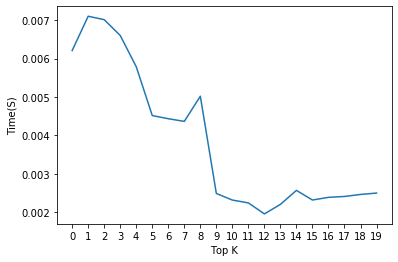

In [82]:
x = range(20)  
y = time_list 
plt.xticks(range(len(x)))
plt.plot(x, y)

plt.xlabel("Top K")
plt.ylabel("Time(S)")
plt.show()  

It took 7.190412282943726 seconds to build forest.
It took 8.061031103134155 seconds to build forest.
It took 9.915420055389404 seconds to build forest.
It took 13.641149282455444 seconds to build forest.


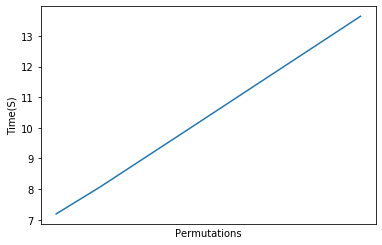

In [88]:
time_list=[]
x = [32,64,128,256]
for i in x:
    forest,build_time = get_forest(db, i)
    time_list.append(build_time)

y = time_list 
plt.xticks(range(len(x)))
plt.plot(x, y)
plt.xlabel("Permutations")
plt.ylabel("Time(S)")
plt.show()  

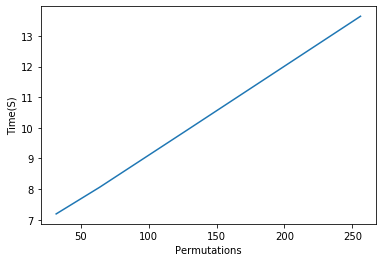

In [90]:
y = time_list 
# plt.xticks(range(len(x)))
plt.plot(x, y)
plt.xlabel("Permutations")
plt.ylabel("Time(S)")
plt.show()  

It took 7.304084300994873 seconds to build forest.
It took 8.635247707366943 seconds to build forest.
It took 11.265644073486328 seconds to build forest.
It took 14.6911039352417 seconds to build forest.


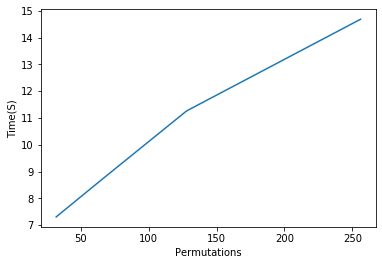

In [91]:
time_list=[]
forest_list=[]
x = [32,64,128,256]
for i in x:
    forest,build_time = get_forest(db, i)
    forest_list.append(forest)
    time_list.append(build_time)

y = time_list 
# plt.xticks(range(len(x)))
plt.plot(x, y)
plt.xlabel("Permutations")
plt.ylabel("Time(S)")
plt.show()  

In [96]:
for i in forest_list:
    print(size(i))

MinHashLSHForest    	56
None
MinHashLSHForest    	56
None
MinHashLSHForest    	56
None
MinHashLSHForest    	56
None


In [99]:
from guppy import hpy
import sys
mem = hpy()
print(mem.heap())
forest,build_time = get_forest(db, 32)
print(mem.heap())

ModuleNotFoundError: No module named 'guppy'

In [100]:
#data wrangling packages
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import random 
random.seed(13)

#visualization packages
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline
import seaborn as sns

In [101]:
df = pd.read_csv("./data/papers.csv")
df.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [102]:
n_features = 1000
n_topics = 8
n_top_words = 10


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,max_features=n_features,stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(df['paper_text'])


nmf = NMF(n_components=n_topics, random_state=0,alpha=.1, l1_ratio=.5).fit(tfidf)

print("Topics found via NMF:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Topics found via NMF:

Topic #0:
algorithm matrix convex theorem bound log loss problem optimization function

Topic #1:
network networks units layer training neural input hidden output learning

Topic #2:
policy state action reward agent actions reinforcement learning policies states

Topic #3:
model data models distribution posterior latent bayesian inference gaussian likelihood

Topic #4:
image images object visual features objects model feature recognition pixel

Topic #5:
neurons spike neuron synaptic stimulus firing cells activity cell time

Topic #6:
graph tree node nodes clustering graphs cluster algorithm clusters edges

Topic #7:
kernel data training classification svm learning kernels xi classifier feature



In [103]:
topics = ['optimization algorithms',
          'neural network application',
          'reinforcement learning',
          'bayesian methods',
          'image recognition',
          'artificial neuron design',
          'graph theory',
          'kernel methods'
         ]

In [105]:
nmf_embedding = nmf.transform(tfidf)
nmf_embedding = (nmf_embedding - nmf_embedding.mean(axis=0))/nmf_embedding.std(axis=0)

In [107]:
top_idx = np.argsort(nmf_embedding,axis=0)[-3:]

count = 0
for idxs in top_idx.T: 
    print("\nTopic {}:".format(count))
    for idx in idxs:
        print(df.iloc[idx]['title'])
    count += 1


Topic 0:
Provable Efficient Online Matrix Completion via Non-convex Stochastic Gradient Descent
Stochastic optimization and sparse statistical recovery: Optimal algorithms for high dimensions
On the Linear Convergence of the Proximal Gradient Method for Trace Norm Regularization

Topic 1:
Skeletonization: A Technique for Trimming the Fat from a Network via Relevance Assessment
The Recurrent Cascade-Correlation Architecture
Refining PID Controllers using Neural Networks

Topic 2:
Experimental Results on Learning Stochastic Memoryless Policies for Partially Observable Markov Decision Processes
State Abstraction in MAXQ Hierarchical Reinforcement Learning
Improved Switching among Temporally Abstract Actions

Topic 3:
Bayesian Sparse Factor Models and DAGs Inference and Comparison
Slice sampling covariance hyperparameters of latent Gaussian models
Dependent Multinomial Models Made Easy: Stick-Breaking with the Polya-gamma Augmentation

Topic 4:
Memorability of Image Regions
Im2Text: Descr

In [108]:
topics = ['optimization algorithms',
          'neural network application',
          'reinforcement learning',
          'bayesian methods',
          'image recognition',
          'artificial neuron design',
          'graph theory',
          'kernel methods'
         ]

In [109]:
tsne = TSNE(random_state=3211)
tsne_embedding = tsne.fit_transform(nmf_embedding)
tsne_embedding = pd.DataFrame(tsne_embedding,columns=['x','y'])
tsne_embedding['hue'] = nmf_embedding.argmax(axis=1)

In [113]:
nmf_embedding

array([[ 0.18296133,  0.26735409, -0.2213612 , ..., -0.0511799 ,
         0.48023549, -0.37466679],
       [-0.92348385,  0.9951816 , -0.39372979, ...,  2.54601793,
        -0.51681549, -0.64963136],
       [-0.92348385, -0.4604535 , -0.39372979, ...,  2.84487394,
        -0.51681549, -0.64963136],
       ...,
       [-0.76900282,  0.95906605, -0.18000215, ...,  1.0665942 ,
         0.52337991, -0.62322531],
       [-0.85175676,  0.1461965 ,  0.08870387, ...,  0.94392854,
        -0.51681549, -0.12971767],
       [-0.92348385,  0.25488877,  0.23271442, ..., -0.32536694,
        -0.51681549, -0.64963136]])

In [112]:
tsne_embedding

,x,y,hue
0,-9.190134,35.413063,4
1,51.162403,34.995338,5
2,44.959511,52.741528,5
3,-3.304435,2.795137,3
4,28.577814,-0.880817,1
5,-0.073279,26.227720,4
6,44.570671,9.655113,1
7,55.025757,16.565563,1
8,57.276543,8.895735,1
9,55.319099,13.732885,1


In [110]:
colors = np.array([[ 0.89411765,  0.10196079,  0.10980392,  1. ],
 [ 0.22685121,  0.51898501,  0.66574396,  1. ],
 [ 0.38731259,  0.57588621,  0.39148022,  1. ],
 [ 0.7655671 ,  0.38651289,  0.37099578,  1. ],
 [ 1.        ,  0.78937332,  0.11607843,  1. ],
 [ 0.75226453,  0.52958094,  0.16938101,  1. ],
 [ 0.92752019,  0.48406   ,  0.67238756,  1. ],
 [ 0.60000002,  0.60000002,  0.60000002,  1. ]])

legend_list = []

for i in range(len(topics)):   
    color = colors[i]
    legend_list.append(mpatches.Ellipse((0, 0), 1, 1, fc=color))

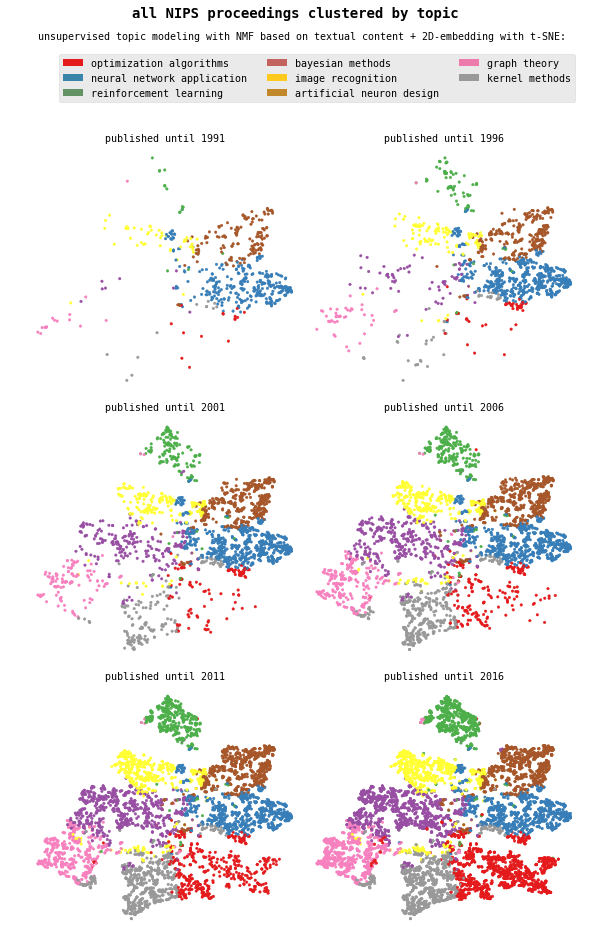

In [111]:
matplotlib.rc('font',family='monospace')
plt.style.use('ggplot')


fig, axs = plt.subplots(3,2, figsize=(10, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=0)

axs = axs.ravel()

count = 0
legend = []
for year, idx in zip([1991,1996,2001,2006,2011,2016], range(6)):
    data = tsne_embedding[df['year']<=year]
    scatter = axs[idx].scatter(data=data,x='x',y='y',s=6,c=data['hue'],cmap="Set1")
    axs[idx].set_title('published until {}'.format(year),**{'fontsize':'10'})
    axs[idx].axis('off')

plt.suptitle("all NIPS proceedings clustered by topic",**{'fontsize':'14','weight':'bold'})
plt.figtext(.51,0.95,'unsupervised topic modeling with NMF based on textual content + 2D-embedding with t-SNE:', **{'fontsize':'10','weight':'light'}, ha='center')


fig.legend(legend_list,topics,loc=(0.1,0.89),ncol=3)
plt.subplots_adjust(top=0.85)

plt.show()

In [115]:
permutations=128
forest,build_time = get_forest(db, permutations)
title = 'Using a neural net to instantiate a deformable model'
result,restime = predict(title, db, permutations, num_recommendations, forest)

It took 10.051574945449829 seconds to build forest.
It took 0.005634307861328125 seconds to query forest.


In [215]:
def get_topic_by_id(id):
#     id=512?
    idx=db[db['id']==id].index.values
    idx=int(idx)
    topic=int(tsne_embedding.loc[idx]['hue'])
    return topic
# id=512

In [210]:
def get_topic_by_title(title):
#     id=512?
    idx=db[db['title']==title].index.values
    idx=int(idx)
    topic=int(tsne_embedding.loc[idx]['hue'])
    return topic
# id=512

In [186]:
def get_title(id):
    idx=db[db['id']==id]['title']
    return idx

# return topic

In [146]:
topic(512)

7

In [179]:
title(512).values[0]

'Structural Risk Minimization for Character Recognition'

In [206]:
num_recommendations = 5
id=512
title = get_title(id).values[0]
result,restime = predict(title, db, permutations, num_recommendations, forest)
print(result)


It took 0.008178949356079102 seconds to query forest.
2113                       Searching for Character Models
5891    Planar Hidden Markov Modeling: From Speech to ...
4553    Structural Risk Minimization for Character Rec...
4782    Adaptive Elastic Models for Hand-Printed Chara...
1916     Semi-supervised Learning by Entropy Minimization
Name: title, dtype: object


In [223]:
id=512
right=get_topic_by_id(id)
print("test ID:",get_topic_by_id(id))
fp=0
total=num_recommendations
for i in list(result):
    temp=get_topic_by_title(i)
    if right!=temp:
        fp+=1
fp_rate=fp/total
fp_rate

test ID: 7


0.6

In [246]:
def get_avg(arr):
    count=0
    for i in arr:
        count+=i
    return count/len(arr)

In [247]:
get_avg([1,2])

1.5

In [242]:
fp_rate_list=[]
permutations=128
num_recommendations=3
forest,build_time = get_forest(db, permutations)
for id in db['id'].values:
    print(id)
    title = get_title(id).values[0]
    result,restime = predict(title, db, permutations, num_recommendations, forest)
    
    right=get_topic_by_id(id)
    fp=0
    total=num_recommendations
    for i in list(result):
        temp=get_topic_by_title(i)
        if right!=temp:
            fp+=1
    fp_rate=fp/total
    fp_rate_list.append(fp_rate)

It took 9.98962926864624 seconds to build forest.
1
10
100
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
101
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
102
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
103
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
104
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
105
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
106
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
107
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
108
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
109
1090
1091
1092
1094
1095
1096
1097
1098
1099
11
110
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
111
1111
1112
1113
1114
1115
1116
1117
1118
1119
112
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
113
1130
1131
1132
1133
1134
1135
1136
1138
1139
114
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
115
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
116
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177

2529
253
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
254
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
255
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
256
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
257
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
258
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
259
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
26
260
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
261
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
262
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
263
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
264
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
265
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
266
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
267
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
268
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
269
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
27
270
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
27

TypeError: cannot unpack non-iterable NoneType object

In [248]:
get_avg(fp_rate_list)

0.44588382783117264

(array([ 396.,    0.,    0.,  796.,    0.,    0., 1198.,    0.,    0.,
           3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

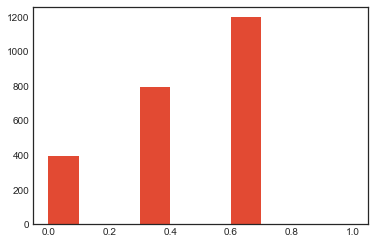

In [243]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = fp_rate_list
#最基本的频次直方图命令
plt.hist(data)

In [256]:
avg_list=[]
for N in [32,64,128,256,512]:
    fp_rate_list=[]
    permutations=N
    num_recommendations=5
    forest,build_time = get_forest(db, permutations)
    for id in db['id'].values:
#         print(id)
        title = get_title(id).values[0]
        result,restime = predict(title, db, permutations, num_recommendations, forest)

        right=get_topic_by_id(id)
        fp=0
        total=num_recommendations
        for i in list(result):
            temp=get_topic_by_title(i)
            if right!=temp:
                fp+=1
        fp_rate=fp/total
        fp_rate_list.append(fp_rate)
    avg=get_avg(fp_rate_list)
    print("avg:",avg)
    avg_list.append(avg)

It took 7.588892698287964 seconds to build forest.


TypeError: cannot unpack non-iterable NoneType object

In [254]:
avg_list

[]

In [278]:
N=512
fp_rate_list=[]
permutations=N
num_recommendations=5
forest,build_time = get_forest(db, permutations)
for id in db['id'].values:
    print(id)
    title = get_title(id).values[0]
    result,restime = predict(title, db, permutations, num_recommendations, forest)

    right=get_topic_by_id(id)
    fp=0
    total=num_recommendations
    for i in list(result):
        temp=get_topic_by_title(i)
        if right!=temp:
            fp+=1
    fp_rate=fp/total
    fp_rate_list.append(fp_rate)
avg=get_avg(fp_rate_list)
print("avg:",avg)

It took 20.75197410583496 seconds to build forest.
1
10
100
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
101
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
102
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
103
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
104
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
105
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
106
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
107
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
108
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
109
1090
1091
1092
1094
1095
1096
1097
1098
1099
11
110
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
111
1111
1112
1113
1114
1115
1116
1117
1118
1119
112
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
113
1130
1131
1132
1133
1134
1135
1136
1138
1139
114
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
115
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
116
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
117

2524
2525
2526
2527
2528
2529
253
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
254
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
255
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
256
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
257
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
258
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
259
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
26
260
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
261
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
262
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
263
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
264
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
265
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
266
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
267
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
268
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
269
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
27
270
2700
2701
2702
2703
2704
2705
2706
2707
27

TypeError: cannot unpack non-iterable NoneType object

In [264]:
avg=get_avg(fp_rate_list)

In [266]:
avg=get_avg(fp_rate_list)
avg_list.append(avg)

In [267]:
avg_list

[0.5758384146341368]

In [270]:
avg=get_avg(fp_rate_list)
print("avg:",avg)
avg_list.append(avg)

avg: 0.558880066861673


In [271]:
avg_list

[0.5758384146341368, 0.558880066861673]

In [273]:
avg=get_avg(fp_rate_list)
print("avg:",avg)
avg_list.append(avg)

avg: 0.5521103217718272


In [274]:
avg_list

[0.5758384146341368, 0.558880066861673, 0.5521103217718272]

In [276]:
avg=get_avg(fp_rate_list)
print("avg:",avg)
avg_list.append(avg)

avg: 0.5803278688524484


In [277]:
avg_list

[0.5758384146341368, 0.558880066861673, 0.5521103217718272, 0.5803278688524484]

In [279]:
avg=get_avg(fp_rate_list)
print("avg:",avg)
avg_list.append(avg)

avg: 0.5880289744567185


In [280]:
avg_list

[0.5758384146341368,
 0.558880066861673,
 0.5521103217718272,
 0.5803278688524484,
 0.5880289744567185]

In [281]:
X=[32,64,128,256,512]

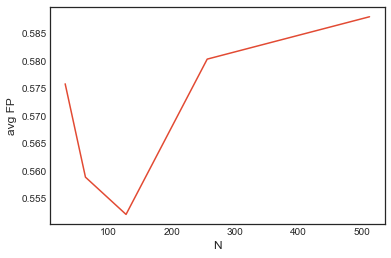

In [283]:
x = [32,64,128,256,512]  
y = avg_list 
# plt.xticks(range(len(x)))
plt.plot(x, y)

plt.xlabel("N")
plt.ylabel("avg FP")
plt.show()  

array([   4,    6,    7,    8,    9,   10,   12,   13,   19,   20,   26,
         32,   34,   35,   37,   39,   43,   45,   50,   51,   57,   59,
         64,   66,   68,   69,   71,   75,   76,   82,   85,   87,   92,
         93,   98,  101,  111,  112,  113,  114,  115,  117,  119,  120,
        123,  124,  125,  126,  132,  140,  141,  144,  149,  151,  152,
        154,  155,  156,  157,  162,  164,  167,  171,  172,  175,  176,
        179,  180,  187,  192,  193,  194,  197,  199,  200,  207,  208,
        209,  211,  212,  215,  216,  217,  222,  225,  231,  233,  235,
        237,  241,  242,  244,  248,  253,  255,  257,  259,  262,  267,
        273,  274,  276,  280,  282,  286,  291,  296,  297,  301,  302,
        307,  308,  309,  317,  320,  321,  326,  329,  332,  335,  338,
        342,  343,  344,  351,  354,  361,  372,  377,  383,  384,  389,
        392,  394,  396,  404,  406,  409,  422,  427,  428,  434,  438,
        439,  445,  450,  456,  458,  461,  467,  4

In [317]:
l=[]
for i in range(1,8):
    temp=[]
    temp=tsne_embedding[tsne_embedding['hue']==i].index.values
    temp=list(temp)
    l.append(temp)

In [318]:
l

[[4,
  6,
  7,
  8,
  9,
  10,
  12,
  13,
  19,
  20,
  26,
  32,
  34,
  35,
  37,
  39,
  43,
  45,
  50,
  51,
  57,
  59,
  64,
  66,
  68,
  69,
  71,
  75,
  76,
  82,
  85,
  87,
  92,
  93,
  98,
  101,
  111,
  112,
  113,
  114,
  115,
  117,
  119,
  120,
  123,
  124,
  125,
  126,
  132,
  140,
  141,
  144,
  149,
  151,
  152,
  154,
  155,
  156,
  157,
  162,
  164,
  167,
  171,
  172,
  175,
  176,
  179,
  180,
  187,
  192,
  193,
  194,
  197,
  199,
  200,
  207,
  208,
  209,
  211,
  212,
  215,
  216,
  217,
  222,
  225,
  231,
  233,
  235,
  237,
  241,
  242,
  244,
  248,
  253,
  255,
  257,
  259,
  262,
  267,
  273,
  274,
  276,
  280,
  282,
  286,
  291,
  296,
  297,
  301,
  302,
  307,
  308,
  309,
  317,
  320,
  321,
  326,
  329,
  332,
  335,
  338,
  342,
  343,
  344,
  351,
  354,
  361,
  372,
  377,
  383,
  384,
  389,
  392,
  394,
  396,
  404,
  406,
  409,
  422,
  427,
  428,
  434,
  438,
  439,
  445,
  450,
  456,
  458,
  46

In [310]:
l

[array([   4,    6,    7,    8,    9,   10,   12,   13,   19,   20,   26,
          32,   34,   35,   37,   39,   43,   45,   50,   51,   57,   59,
          64,   66,   68,   69,   71,   75,   76,   82,   85,   87,   92,
          93,   98,  101,  111,  112,  113,  114,  115,  117,  119,  120,
         123,  124,  125,  126,  132,  140,  141,  144,  149,  151,  152,
         154,  155,  156,  157,  162,  164,  167,  171,  172,  175,  176,
         179,  180,  187,  192,  193,  194,  197,  199,  200,  207,  208,
         209,  211,  212,  215,  216,  217,  222,  225,  231,  233,  235,
         237,  241,  242,  244,  248,  253,  255,  257,  259,  262,  267,
         273,  274,  276,  280,  282,  286,  291,  296,  297,  301,  302,
         307,  308,  309,  317,  320,  321,  326,  329,  332,  335,  338,
         342,  343,  344,  351,  354,  361,  372,  377,  383,  384,  389,
         392,  394,  396,  404,  406,  409,  422,  427,  428,  434,  438,
         439,  445,  450,  456,  458, 

In [340]:
forest_list=[]
x=[]
y=[]
for i in range(0,7):
    nowdb=db.iloc[l[i]]
    print(nowdb.shape[0])
    x.append(nowdb.shape[0])
    forest,build_time = get_forest(nowdb, permutations)
    y.append(build_time)
    forest_list.append(forest)

877
It took 2.1507070064544678 seconds to build forest.
553
It took 1.8799114227294922 seconds to build forest.
1052
It took 4.097098112106323 seconds to build forest.
683
It took 2.3175501823425293 seconds to build forest.
736
It took 1.989516019821167 seconds to build forest.
677
It took 2.552457571029663 seconds to build forest.
839
It took 2.9482851028442383 seconds to build forest.


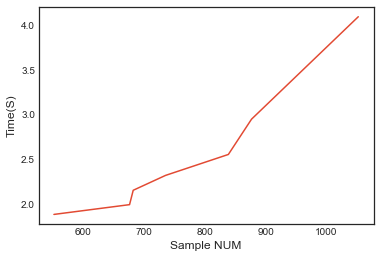

In [350]:


# plt.xticks(range(len(x)))
plt.plot(x, y)

plt.xlabel("Sample NUM")
plt.ylabel("Time(S)")
plt.show()  

In [341]:
x

[877, 553, 1052, 683, 736, 677, 839]

In [342]:
y

[2.150794506072998,
 1.8799974918365479,
 4.09717321395874,
 2.3176159858703613,
 1.9895906448364258,
 2.5525753498077393,
 2.948349714279175]

In [348]:
x=sorted(x)

In [349]:
y=sorted(y)

In [351]:
permutations

512

In [435]:
avg=[]
num_recommendations=10
for i in range(0,8):
    avg.append([])

for id in db['id'].values:
    print(id)
    title = get_title(id).values[0]
    right=get_topic_by_id(id)
    print(right)
    nowdb=db.iloc[l[right-1]]
    nowforest=forest_list[right-1]
#     print(title, nowdb, permutations, num_recommendations, nowforest)
#     flag=False
#     for i in (title, nowdb, permutations, num_recommendations, forest):
#         if i is None:
#             flag=True
#     if flag:
#         continue
#     try:
#         out,restime = predict(title, nowdb, permutations, num_recommendations, nowforest)
#     except:
#         continue # 再循环中捕获到异常后要求继续即可
    
    out,restime = predict(title, nowdb, permutations, num_recommendations, nowforest)
    if out is None:
        continue
    fp=0
    total=num_recommendations
    for i in list(out):
        temp=get_topic_by_title(i)
        if right!=temp:
            fp+=1
        else:
            print(right,temp)
    fp_rate=fp/total
    if(fp_rate==1.0):
        fp_rate=fp_rate*0.6
    print(fp,fp_rate)
    avg[right-1].append(fp_rate)

1
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
10
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
100
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1000
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
1001
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1002
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
1003
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1004
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1005
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1006
1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1007
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1008
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
1009
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
101
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1010
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1011
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
1012
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
1013
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1014
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1015
1
1 1
1 1
1

5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1158
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1159
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
116
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1160
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
1161
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
1162
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1163
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1164
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1165
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
1166
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
1167
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
1168
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
1169
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
1170
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1171
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
1172
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
1173
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1174
0
10 0.6
1175
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1314
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1315
0
10 0.6
1316
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
1317
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
1318
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
1319
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
132
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1320
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1321
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
1322
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1323
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1324
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1325
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
1326
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
1327
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
1328
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
1329
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
133
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1330
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 

5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1467
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1468
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
1469
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
147
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
1470
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1471
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1472
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1473
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
1474
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
1475
0
10 0.6
1476
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
1477
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1478
0
10 0.6
1479
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
148
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1480
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
1481
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
1482
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
1483
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
1484
6
6 6
6 6
6 6
6 6
6 6


1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1620
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1621
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1622
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
1623
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
1624
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1625
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
1626
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
1627
0
10 0.6
1628
5
5 5
5 5
0 0.0
1629
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
163
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1630
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1631
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
1632
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
1633
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1634
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
1635
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1636
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1637
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
1638
4
4 4
4 4
4 

5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1777
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
1778
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
1779
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
178
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1780
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1781
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1782
1
1 1
0 0.0
1783
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
1784
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
1785
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
1786
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
1787
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
1788
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
1789
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
179
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1790
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
1791
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
1792
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
1793
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5

3 3
3 3
3 3
3 3
3 3
0 0.0
1932
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
1933
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
1934
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1935
0
10 0.6
1936
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
1937
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
1938
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
1939
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
194
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
1940
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1941
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
1942
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
1943
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
1944
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
1945
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
1946
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
1947
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
1948
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
1949
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
195
1
1 1
1 1
1

7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2088
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
2089
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
209
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
2090
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
2091
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2092
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
2093
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
2094
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2095
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2096
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
2097
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2098
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
2099
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
21
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
210
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
2100
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2101
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
2102
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
2103

5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
2244
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2245
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
2246
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
2247
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
2248
0
10 0.6
2249
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
225
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
2250
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
2251
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
2252
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
2253
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
2254
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
2255
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
2256
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2257
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2258
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
2259
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
226
0
10 0.6
2260
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
2261
7
7 7
7 7
7 7
7 7
7 

4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
2400
3
3 3
3 3
3 3
3 3
0 0.0
2401
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
2402
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
2403
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2404
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
2405
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2406
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
2407
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
2408
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
2409
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
241
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
2410
0
10 0.6
2411
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
2412
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
2413
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
2414
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
2415
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
2416
0
10 0.6
2417
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2418
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0

6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
256
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
2560
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2561
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
2562
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
2563
0
10 0.6
2564
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
2565
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
2566
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2567
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
2568
2
2 2
0 0.0
2569
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
257
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
2570
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
2571
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
2572
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
2573
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2574
0
10 0.6
2575
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
2576
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2577
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2578
7
7 7

6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
2719
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
272
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
2720
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2721
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
2722
0
10 0.6
2723
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
2724
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2725
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2726
0
10 0.6
2727
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
2728
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2729
0
10 0.6
273
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
2730
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
2731
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
2732
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
2733
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
2734
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
2735
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
2736
0
10 0.6
2737
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0

5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
2887
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
2888
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
2889
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
289
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
2890
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2891
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
2892
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
2893
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
2894
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
2895
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
2896
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
2897
5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
2898
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
2899
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
29
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
290
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
2900
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
2901
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
2902
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6

3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3042
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
3043
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
3044
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3045
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
3046
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
3047
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3048
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
3049
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
3050
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
3051
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3052
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
3053
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
3054
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
3055
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3056
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3057
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3058
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3059
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0


6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
3201
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3202
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3203
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3204
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3205
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3206
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
3207
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3208
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3209
0
10 0.6
321
2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
3210
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
3211
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3212
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3213
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
3214
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3215
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3216
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
3217
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
3218
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3219
3
3 3


0
10 0.6
3359
0
10 0.6
336
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
3360
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
3361
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
3362
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3363
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
3364
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
3365
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3366
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3367
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
3368
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3369
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
337
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
3370
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3371
0
10 0.6
3372
0
10 0.6
3373
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
3374
0
10 0.6
3375
0
3 0.3
3376
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3377
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
3378
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
3379
3
338
1
1 1
1 1
1 

3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3525
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
3526
0
10 0.6
3527
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3528
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
3529
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
353
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
3530
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
3531
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
3532
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3533
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
3534
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3535
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
3536
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3537
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
3538
0
8 0.8
3539
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
354
0
10 0.6
3540
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
3541
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3542
7
7 7
7 7
7 7
0 0.0
3543
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6

3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3688
0
10 0.6
3689
0
10 0.6
369
1
1 1
0 0.0
3690
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3691
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
3692
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3693
0
10 0.6
3694
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3695
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
3696
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3697
0
10 0.6
3698
0
10 0.6
3699
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
37
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
370
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3700
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3701
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
3702
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3703
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3704
0
10 0.6
3705
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
3706
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3707
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
3708
0
10 0.6
3709
7


6 6
6 6
6 6
0 0.0
3856
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3857
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
3858
6
6 6
0 0.0
3859
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
386
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
3860
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
3861
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
3862
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3863
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3864
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
3865
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3866
0
10 0.6
3867
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3868
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
3869
1
387
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
3870
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
3871
0
10 0.6
3872
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
3873
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
3874
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
3875
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7


6 6
6 6
6 6
6 6
6 6
0 0.0
4028
0
10 0.6
4029
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
403
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
4030
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
4031
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
4032
0
10 0.6
4033
7
7 7
7 7
7 7
7 7
0 0.0
4034
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
4035
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
4036
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
4037
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
4038
0
10 0.6
4039
0
7 0.7
404
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
4040
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
4041
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
4042
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
4043
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
4044
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
4045
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
4046
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
4047
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7

7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
42
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
420
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
4200
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
4201
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
4202
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
4203
0
10 0.6
4204
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
4205
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
4206
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
4207
0
1 0.1
4208
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
4209
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
421
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
4210
3
3 3
3 3
3 3
3 3
3 3
0 0.0
4211
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
4212
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
4213
0
10 0.6
4214
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
4215
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
4216
0
10 0.6
4217
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
4218
0
10 0.6
4219
3
3 3
3 3
3 3
3 3
3

5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
4370
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
4371
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
4372
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
4373
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
4374
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
4375
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
4376
0
4377
0
10 0.6
4378
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
4379
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
438
6
6 6
6 6
6 6
6 6
6 6
0 0.0
4380
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
4381
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
4382
0
10 0.6
4383
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
4384
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
4385
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
4386
0
10 0.6
4387
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
4388
0
10 0.6
4389
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
439
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
4390
0
10 0.

2 2
2 2
2 2
2 2
0 0.0
4552
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
4553
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
4554
3
4555
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
4556
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
4557
0
10 0.6
4558
0
10 0.6
4559
7
7 7
7 7
0 0.0
456
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
4560
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
4561
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
4562
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
4563
0
4564
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
4565
0
4 0.4
4566
6
6 6
6 6
6 6
6 6
6 6
0 0.0
4567
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
4568
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
4569
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
457
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
4570
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
4571
0
10 0.6
4572
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
4573
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
4574
0
10

2 2
0 0.0
4738
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
4739
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
474
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
4740
0
10 0.6
4741
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
4742
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
4743
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
4744
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
4745
0
10 0.6
4746
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
4747
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
4748
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
4749
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
475
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
4750
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
4752
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
4753
0
3 0.3
4754
0
10 0.6
4755
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
4756
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
4757
0
10 0.6
4758
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
4759
5
5 5
5 5
5 5
5 5

10 0.6
4912
0
10 0.6
4913
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
4914
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
4915
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
4916
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
4917
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
4918
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
4919
0
3 0.3
492
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
4920
0
2 0.2
4921
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
4922
0
10 0.6
4923
0
10 0.6
4924
0
3 0.3
4925
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
4926
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
4927
0
10 0.6
4928
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
4929
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
493
0
10 0.6
4930
0
10 0.6
4931
0
10 0.6
4932
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
4933
0
10 0.6
4934
0
10 0.6
4935
0
10 0.6
4936
0
10 0.6
4937
0
10 0.6
4938
0
1 0.1
4939
0
10 0.6
494
0
10 0.6
4940
0
10 0.6
4941
0
10 0.6
4942
0
10 0.6
4943
0
4 0.4
4944

6 6
6 6
0 0.0
5097
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
5098
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5099
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
51
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
510
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
5100
0
10 0.6
5101
0
10 0.6
5102
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5103
0
10 0.6
5104
0
10 0.6
5105
0
10 0.6
5106
0
10 0.6
5107
0
10 0.6
5108
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
5109
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
511
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
5110
0
10 0.6
5111
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
5112
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
5113
0
10 0.6
5114
0
1 0.1
5115
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5116
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5117
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5118
0
10 0.6
5119
0
10 0.6
512
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
5120
2
2 2
2 2
2 2
2 2
2 2
2 

4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
5284
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
5285
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
5286
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
5287
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
5288
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
5289
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
529
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
5290
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
5291
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
5292
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5293
0
10 0.6
5294
0
10 0.6
5295
0
10 0.6
5296
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
5297
0
7 0.7
5298
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5299
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
53
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
530
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
5300
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5301
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
53

10 0.6
5467
0
9 0.9
5468
0
10 0.6
5469
0
10 0.6
547
0
3 0.3
5470
3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5471
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
5472
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
5473
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5474
0
10 0.6
5475
0
10 0.6
5476
0
10 0.6
5477
0
2 0.2
5478
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5479
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
548
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
5480
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
5481
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
5482
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
5483
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5484
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
5485
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
5486
0
10 0.6
5487
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
5488
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
5489
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
549
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
565
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
5650
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5651
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5652
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
5653
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5654
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5655
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5656
3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5657
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5658
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
5659
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
566
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
5660
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5661
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5662
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
5663
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5664
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
5665
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
5666
3
3 3
3 3
3 3
3 3

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
5851
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
5852
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
5853
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
5854
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
5855
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
5856
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
5857
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
5858
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
5859
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
586
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
5860
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
5861
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
5862
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
5863
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
5864
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
5865
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
5866
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
5867
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
5

10 0.6
6042
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
6043
0
10 0.6
6044
0
10 0.6
6045
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
6046
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
6047
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
6048
0
10 0.6
6049
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
605
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
6050
0
7 0.7
6051
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
6052
7
7 7
0 0.0
6053
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
6054
0
10 0.6
6055
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
6056
0
10 0.6
6057
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
6058
0
10 0.6
6059
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
606
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
6060
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
6061
0
10 0.6
6062
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
6063
0
1 0.1
6064
6
6 6
6 6
0 0.0
6065
0
4 0.4
6066
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
6067
4
4 4
4 4
4 4
4 4
4 

4 4
4 4
0 0.0
6231
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
6232
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
6233
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
6234
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
6235
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
6236
0
10 0.6
6237
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
6238
0
10 0.6
6239
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
624
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
6240
0
10 0.6
6241
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
6242
0
7 0.7
6243
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
6244
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
6245
0
10 0.6
6246
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
6247
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
6248
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
6249
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
625
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
6250
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
6251
4
4 4
4 4
4 4

10 0.6
6418
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
6419
0
10 0.6
642
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
6420
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
6421
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
6422
0
10 0.6
6423
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
6424
0
10 0.6
6425
0
10 0.6
6426
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
6427
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
6428
0
10 0.6
6429
0
10 0.6
643
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
6430
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
6431
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
6432
0
10 0.6
6433
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
6434
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
6435
0
10 0.6
6436
0
10 0.6
6437
0
10 0.6
6438
0
6439
0
10 0.6
644
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
6440
0
10 0.6
6441
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
6442
0
10 0.6
6443
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
6444
7
7 7
7

1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
675
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
676
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
677
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
678
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
679
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
68
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
680
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
681
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
682
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
683
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
684
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
685
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
686
0
10 0.6
687
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
689
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
69
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
690
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
691
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
692
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
693
5
5 5

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
829
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
83
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
830
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
831
7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
7 7
0 0.0
832
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
833
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
834
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
835
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
836
0
10 0.6
837
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
838
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
839
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
84
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
840
6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
0 0.0
841
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
842
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
843
2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 0.0
844
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
845
1
1 1
1 1
0 0.0
846
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
986
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
987
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
988
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
989
0
10 0.6
99
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
990
1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0.0
991
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
992
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
993
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0
994
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
996
3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
3 3
0 0.0
997
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
998
5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
5 5
0 0.0
999
4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
0 0.0


In [391]:
num_recommendations

5

In [364]:
avg[1]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [369]:
forest_list[0]

In [382]:
db.iloc[1]

id                                                           10
year                                                       1987
title         A Mean Field Theory of Layer IV of Visual Cort...
event_type                                                  NaN
pdf_name      10-a-mean-field-theory-of-layer-iv-of-visual-c...
abstract                                       Abstract Missing
paper_text    683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
text          A Mean Field Theory of Layer IV of Visual Cort...
Name: 1, dtype: object

In [388]:
for i in range(0,7):
    nowdb=db.iloc[l[i]]
    nowforest=forest_list[i]
    for j in l[i]:
        title=db.iloc[j]['title']
        a=db.iloc[j]['id']
        right=get_topic_by_id(a)
        out,restime = predict(title, db, permutations, num_recommendations, nowforest)
        if out is None:
            continue
            
        
        

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
right=get_topic_by_id(id)
    print(right)
    nowdb=db.iloc[l[right-1]]
    nowforest=forest_list[right-1]

In [428]:
len(avg[i])

839

In [429]:
for i in range(0,len(avg)-1):
    for j in range(0,len(avg[i])):
        print(avg[i][j])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

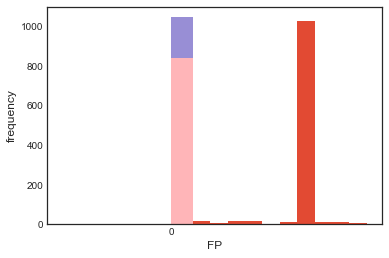

In [443]:
for i in avg:
    print(i)
    data = i
    #最基本的频次直方图命令
    plt.xticks(range(1))
#     plt.plot(x, y)

    plt.xlabel("FP")
    plt.ylabel("frequency")
    plt.hist(data)

In [433]:
avg.remove(avg[7])

In [405]:
t=[]
for i in range(0,7):
    t.append(get_avg(avg[i]))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

(array([  0.,   0.,   0.,   0.,   0., 681.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

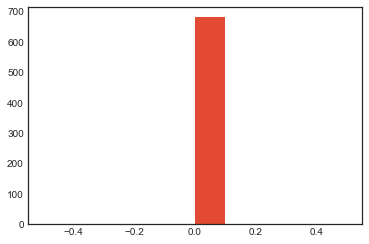

In [401]:
plt.hist(avg[3])